2.4 Intuition for correlated rejections via simulation

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import f

In [52]:
n_list = [2, 4, 8, 16, 32, 64, 128, 256, 512]
rho = 0.1
# mu, alpha_1, alpha_2, sigma_sq = 0, 0, 0, 1

def generate_data(n):
    eps = np.random.multivariate_normal(np.zeros(n), 
                                        (1 - rho) * np.eye(n) + rho * np.outer(np.ones(n), np.ones(n)), 
                                        size=2)
    y = eps
    return y

def F_test(y, alpha = 0.05):
    y1, y2 = y[0], y[1]
    n = len(y[0])
    y1_bar, y2_bar = sum(y1) / n, sum(y2) / n
    S_n_sq = 1 / (2 * n - 2) * (np.sum((y1 - y1_bar) ** 2) + np.sum((y2 - y2_bar) ** 2))
    F = n / 2 * (y1_bar - y2_bar) ** 2 / S_n_sq
    p_val = 1 - f.cdf(F, 1, 2 * n - 2)
    return p_val < alpha

def F_rho_test(y, alpha = 0.05):
    y1, y2 = y[0], y[1]
    n = len(y[0])
    y1_bar, y2_bar = sum(y1) / n, sum(y2) / n
    S_n_sq = 1 / (2 * n - 2) * (np.sum((y1 - y1_bar) ** 2) + np.sum((y2 - y2_bar) ** 2))
    F = n / 2 * (y1_bar - y2_bar) ** 2 / S_n_sq
    sigma_hat_sq = 1 / (2 * n ** 2) * (np.sum(np.subtract.outer(y1, y2) ** 2))
    rho_hat = np.max(1 - S_n_sq / sigma_hat_sq, 0)
    F_rho_hat = (1 - rho_hat) / (1 - rho_hat + rho_hat * n) * F
    p_val = 1 - f.cdf(F_rho_hat, 1, 2 * n - 2)   
    return p_val < alpha

In [59]:
N_iter = 1000
false_rejections = []
corrected_false_rejections = []
for n in n_list:
    count1, count2 = 0, 0  
    for _ in range(N_iter):
        y = generate_data(n)
        if F_test(y): count1 += 1 / N_iter
        if F_rho_test(y): count2 += 1 / N_iter
    false_rejections.append(count1)
    corrected_false_rejections.append(count2)    

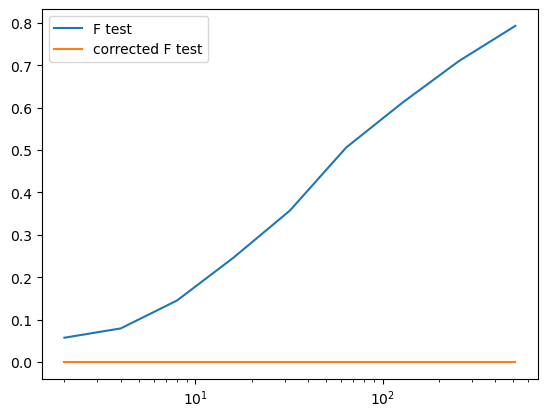

In [60]:
plt.plot(n_list, false_rejections, label='F test')
plt.plot(n_list, corrected_false_rejections, label='corrected F test')
plt.legend()
plt.xscale('log')
plt.show()